# 20210827 Initial Analysis

In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.analysis import plot_redu
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats

## Edit Me
from imaka.reduce.nights import reduce_2021_08_27 as redu
night = '20210827'
fld = 'Fld2'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
## Had an issue with stacking, the gfol
for key in list(redu.dict_images.keys()):
    for i in range(len(redu.dict_images[key])):
        img_num = redu.dict_images[key]
        suf = redu.dict_suffix[key]
        test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)
        
        stars = Table.read(root_dir + f'reduce/{fld}/' + test_img_base + '_clean_stars_stats_mdp.fits')
        print(f"key: {key} image {img_num[i]} stars: {len(stars)}")  

key: open_BRIV image 18 stars: 1080
key: open_BRIV image 21 stars: 761
key: open_BRIV image 24 stars: 623
key: open_BRIV image 27 stars: 787
key: open_BRIV image 33 stars: 1056
key: open_BRIV image 43 stars: 851
key: open_BRIV image 46 stars: 1035
key: LS_BRIV image 10 stars: 2655
key: LS_BRIV image 11 stars: 149
key: LS_BRIV image 13 stars: 3042
key: LS_BRIV image 16 stars: 2620
key: LS_BRIV image 19 stars: 2535
key: LS_BRIV image 25 stars: 2491
key: LS_BRIV image 28 stars: 2307
key: LS_BRIV image 31 stars: 2689
key: LS_BRIV image 41 stars: 1892
key: LS_BRIV image 44 stars: 2033
key: docz_BRIV image 14 stars: 3044
key: docz_BRIV image 17 stars: 2903
key: docz_BRIV image 20 stars: 2637
key: docz_BRIV image 23 stars: 2688
key: docz_BRIV image 26 stars: 2354
key: docz_BRIV image 29 stars: 2586
key: docz_BRIV image 32 stars: 2488
key: docz_BRIV image 42 stars: 1910
key: docz_BRIV image 45 stars: 2249
key: open_RIVB image 49 stars: 1098
key: open_RIVB image 52 stars: 920
key: open_RIVB ima

# Single Image plots

In [26]:
# pick a file based on key
key = 'LS_BRIV'
i = 2
#####
img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

50% EE radius = 0.250"


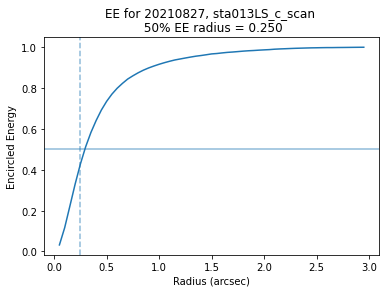

In [27]:
plot_redu.plot_ee_50(test_img_base, root_dir, fld, night)

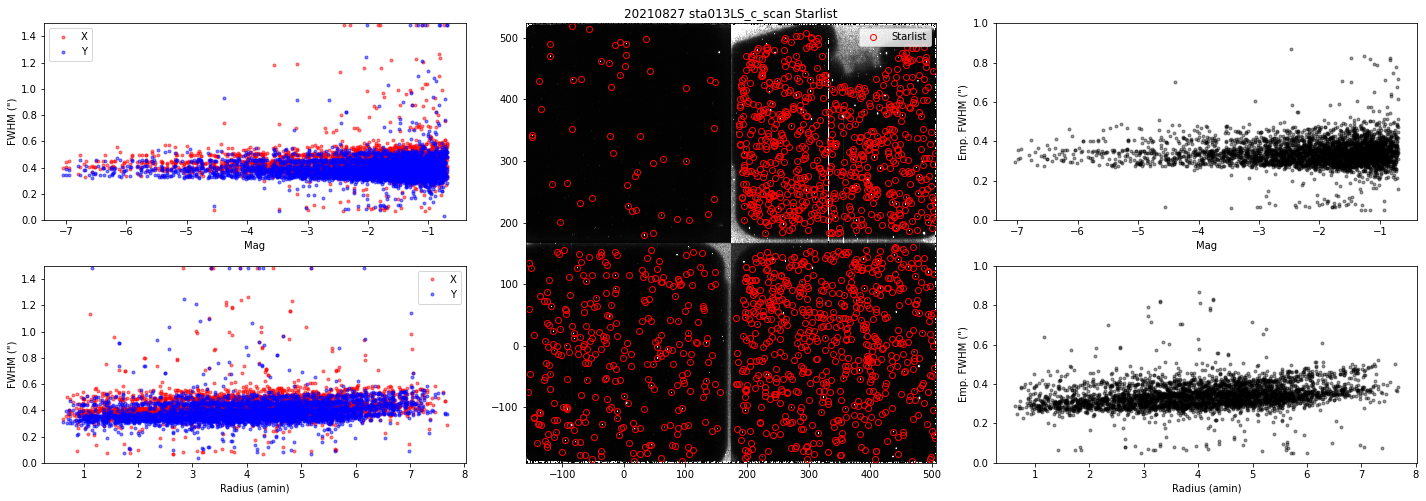

x: fwhm_x_avg = 0.43" fwhm_x_med = 0.42" fwhm_x_std = 0.06"
x: fwhm_x_avg = 0.43" fwhm_x_med = 0.42" fwhm_x_std = 0.06"


In [28]:
plot_redu.plot_starlist_stats(test_img_base, root_dir, fld, night)

Play with a star list and look at trends in FWHM, etc. 

In [8]:
from astropy import table
stars = table.Table.read(root_dir+'reduce/Fld2/sta021_o_scan_clean_stars.txt', format='ascii')

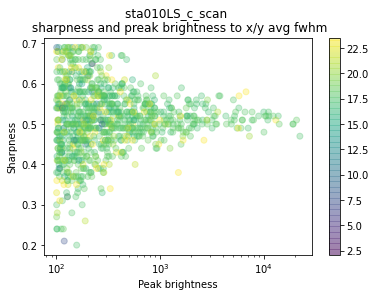

In [11]:
# num pix vs fwhm
plt.scatter(stars['peak'], stars['sharpness'], c=np.average([stars['x_fwhm'], stars['y_fwhm']], axis=0), alpha=0.3)
#plt.xlim(100, 30000)
plt.xscale('log')
plt.xlabel("Peak brightness")
plt.ylabel("Sharpness")
plt.title(test_img_base+ " \n sharpness and preak brightness to x/y avg fwhm")
plt.colorbar()

NOTE: extra stars on top edge and low edges here look like noise. Filtering starlists is advised

# STATS
Various measures of starlists. 

## Moffat profile

In [39]:
stats = Table.read(root_dir + 'reduce/stats/stats_docz_IVBR.fits')
print(stats.colnames)

['Image', 'FILTER', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std']


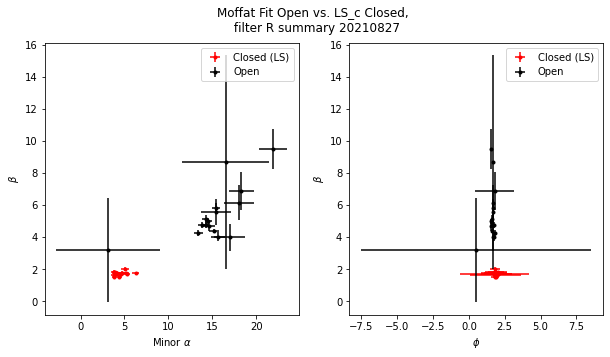

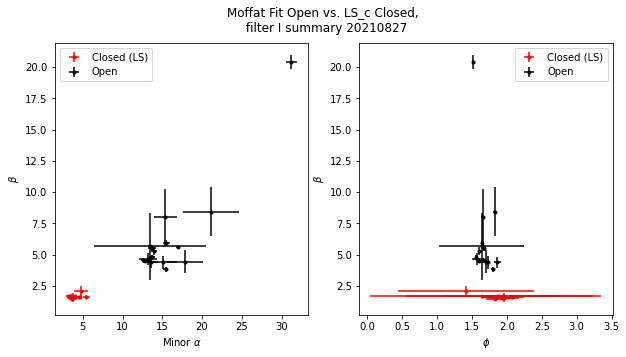

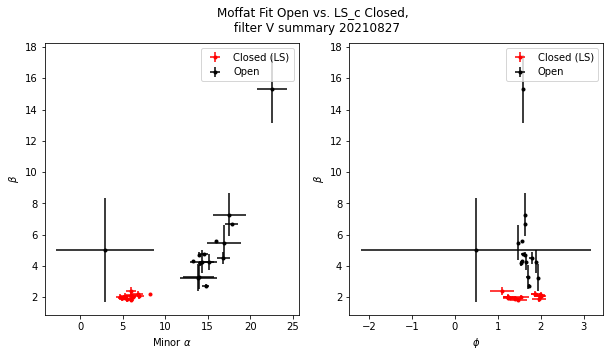

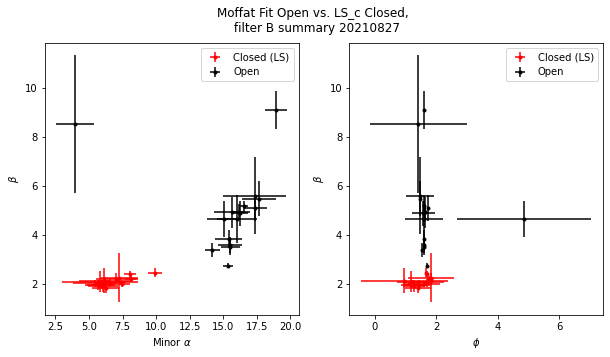

In [64]:
c_key = "LS_c"
plot_redu.plot_moffat_fit_4F("R", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("I", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("V", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("B", root_dir, c_key, fld, night)

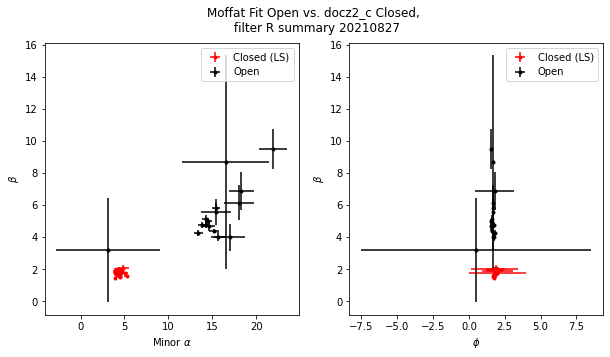

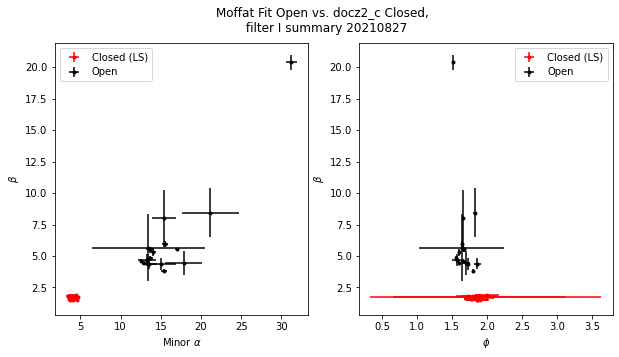

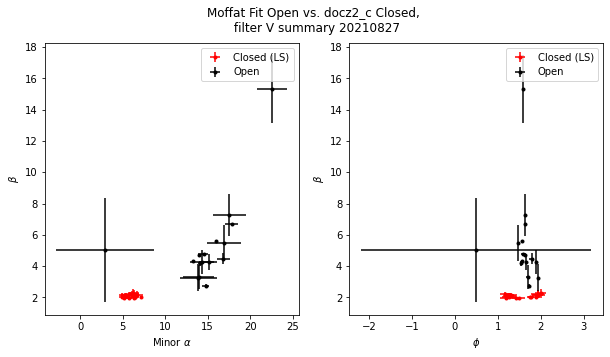

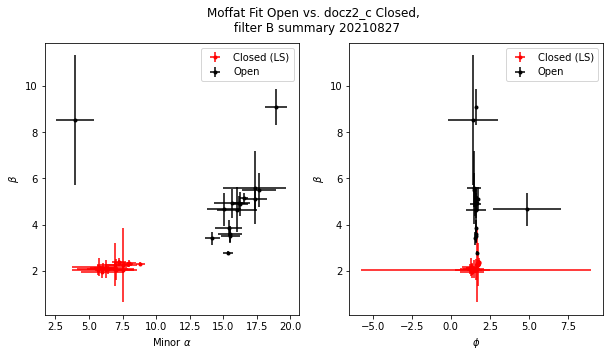

In [65]:
c_key = "docz2_c"
plot_redu.plot_moffat_fit_4F("R", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("I", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("V", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("B", root_dir, c_key, fld, night)

## Stats Stacking

In [67]:
stats = Table.read(root_dir + 'reduce/stats/stats_docz_IVBR_mdp.fits')
print(stats.colnames)
# Not 100% sure which one is FWHM for moffat fit

['Image', 'FILTER', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std', 'DIMM', 'DIMM_dt_hr', 'MASS', 'MASS_dt_hr', 'Cn2dh_005', 'Cn2dh_010', 'Cn2dh_020', 'Cn2dh_040', 'Cn2dh_080', 'Cn2dh_160', 'Cn2dh_dt_hr']


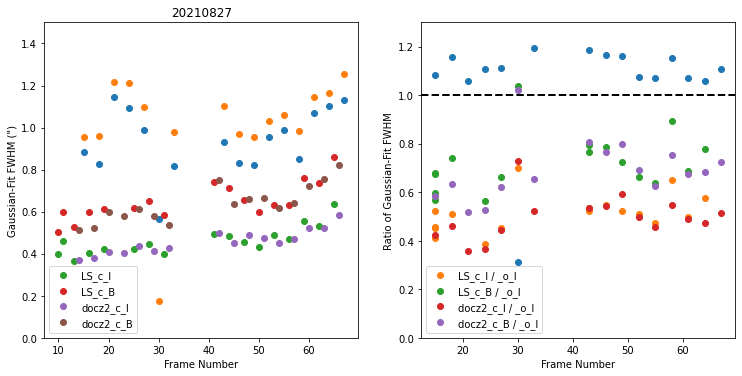

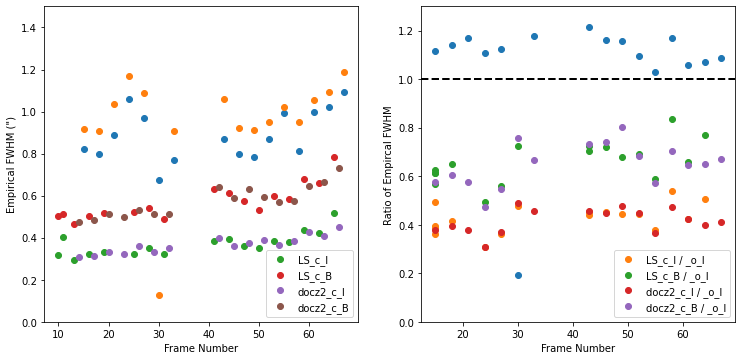

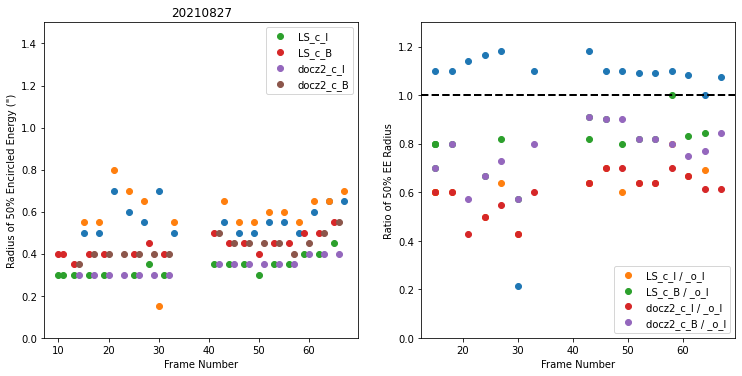

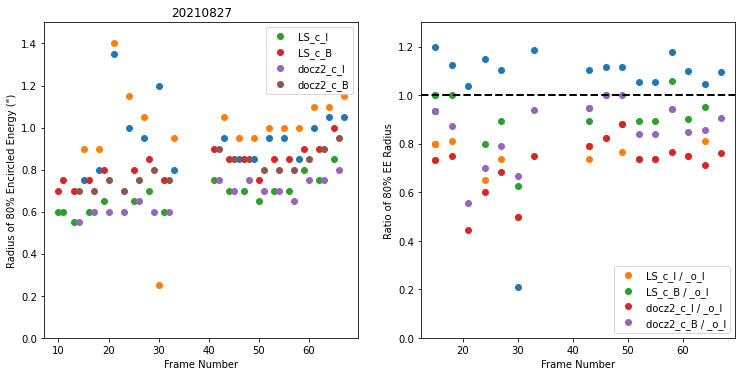

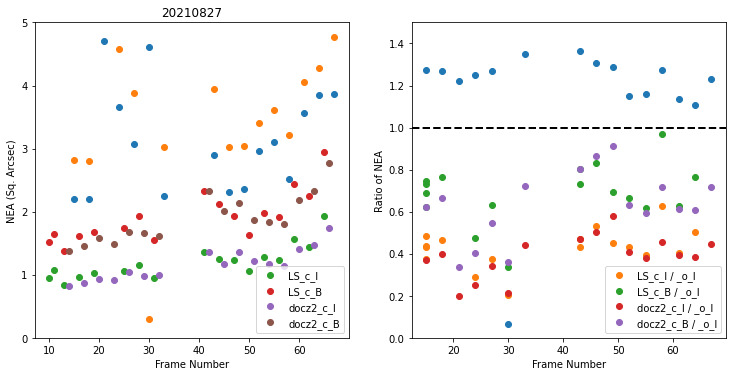

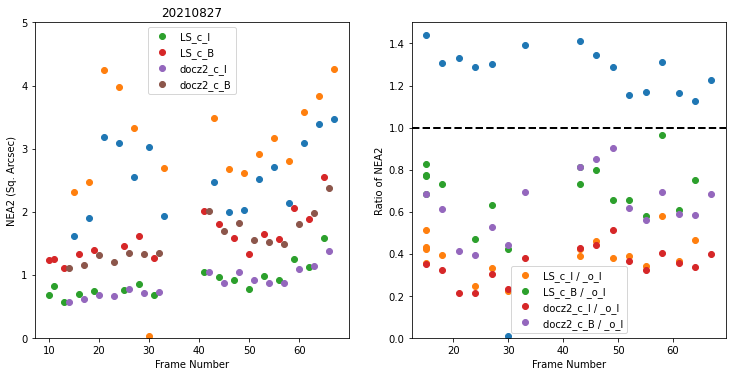

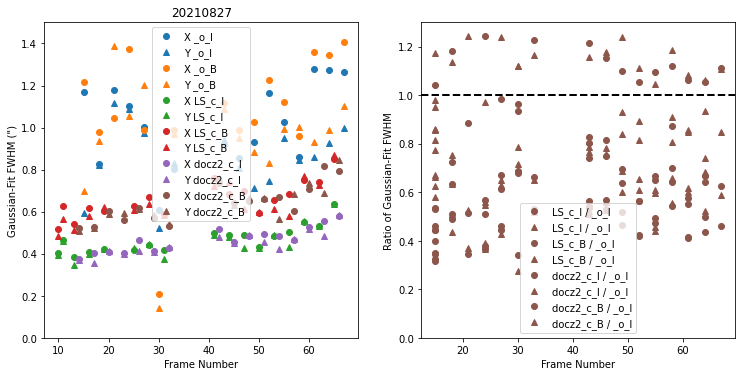

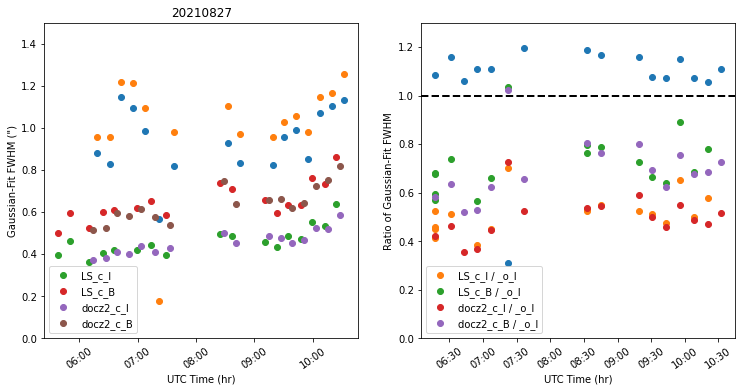

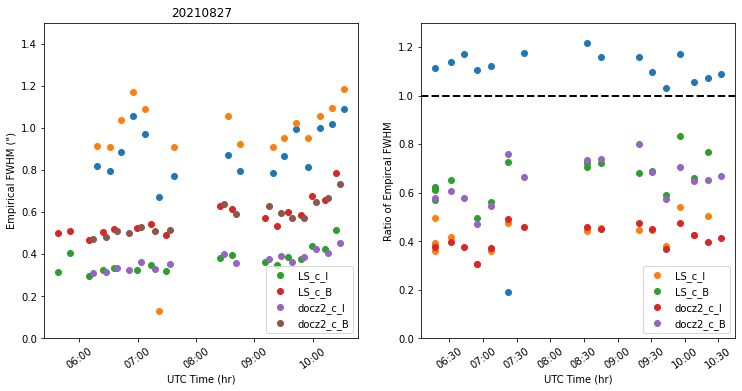

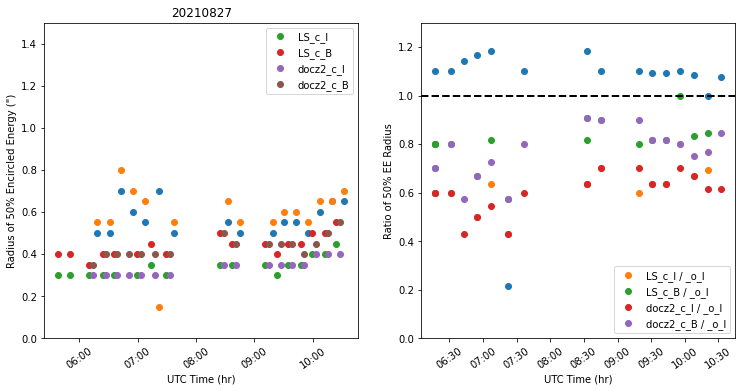

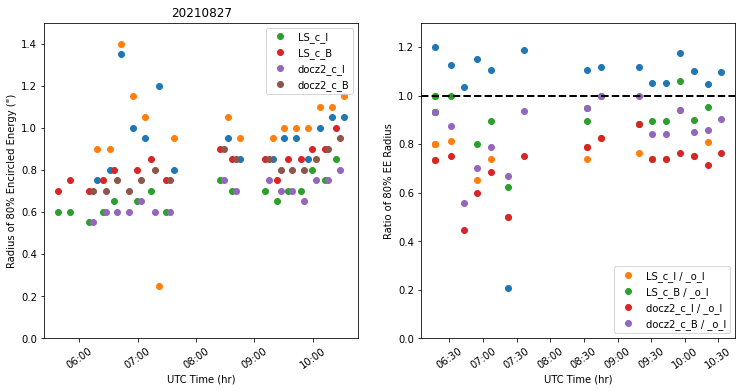

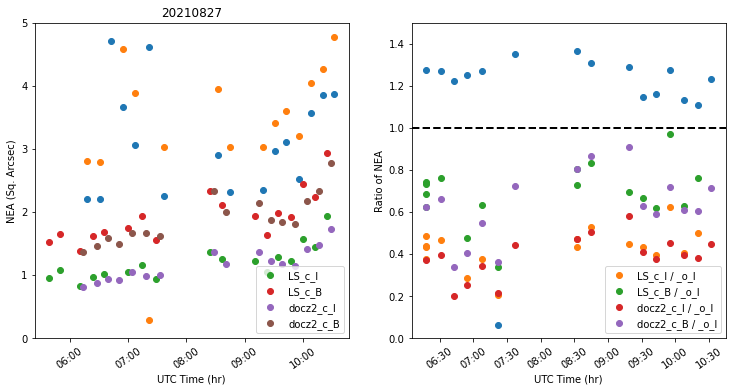

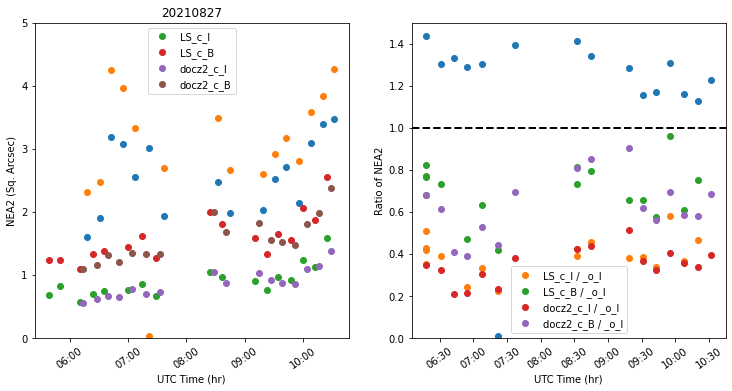

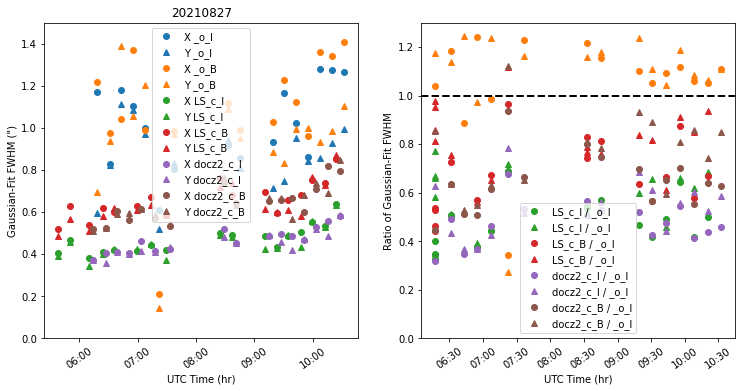

In [111]:
## Must have completed stats
suffixes = list(redu.dict_suffix.keys())
suffixes = ['_o_I', '_o_B', 'LS_c_I', 'LS_c_B', 'docz2_c_I', 'docz2_c_B']
plot_stats.plot_stack_stats(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')
plt.show()

# Time Variation w/MASS-DIMM

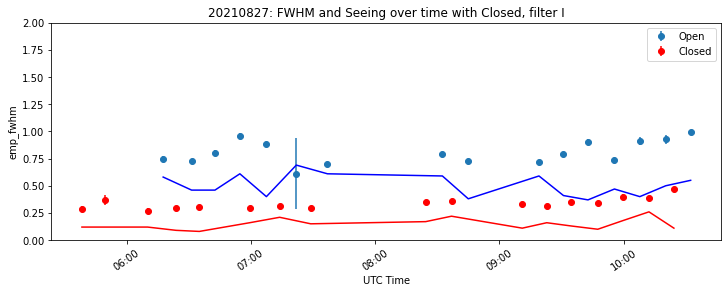

In [108]:
filt = "I"
wav = 806

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

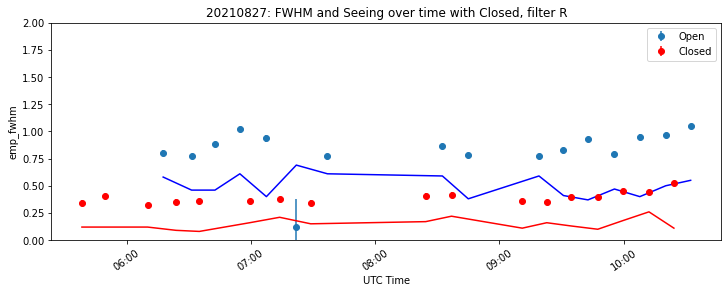

In [110]:
filt = "R"
wav = 658

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

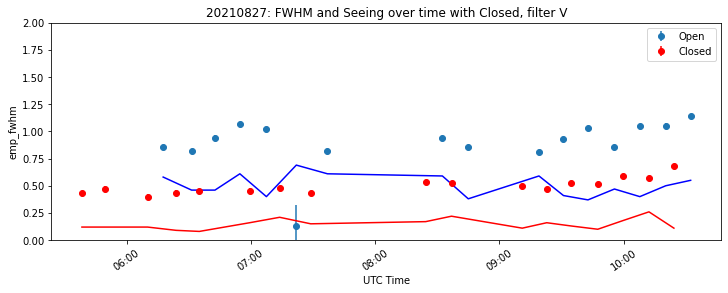

In [109]:
filt = "V"
wav = 551

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

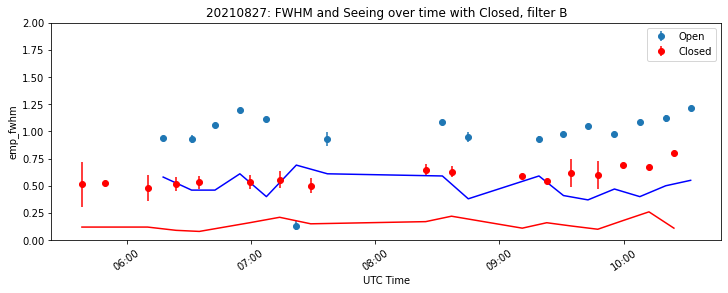

In [107]:
filt = "B"
wav = 445

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

# Aggregate Plots

In [69]:
list(redu.dict_suffix.keys())

['open_BRIV', 'LS_BRIV', 'docz_BRIV', 'open_RIVB', 'LS_RIVB', 'docz_RIVB']

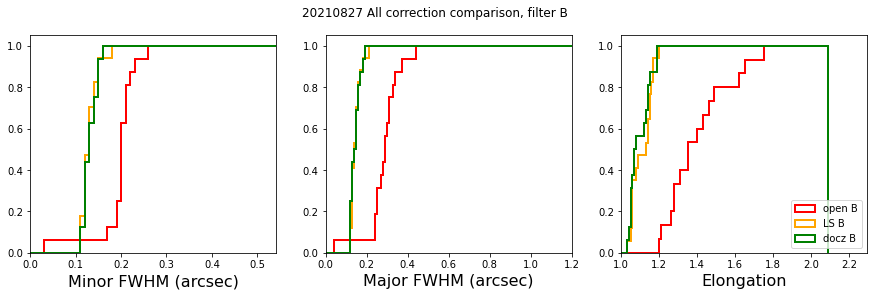

In [101]:
f_band = "B"

files = [f"{stats_dir}stats__o_{f_band}_mdp.fits", f"{stats_dir}stats_LS_c_{f_band}_mdp.fits", f"{stats_dir}stats_docz2_c_{f_band}_mdp.fits"]
labels = ['open '+ f_band, 'LS ' + f_band, 'docz ' + f_band]
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All correction comparison, filter {f_band}")
plt.show()

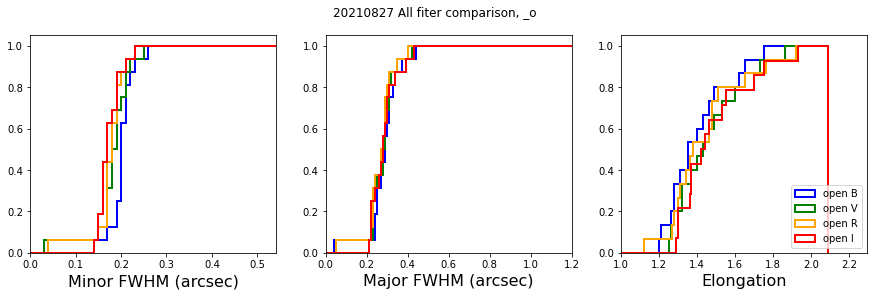

In [98]:
suff = "_o"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['open B', 'open V', 'open R', 'open I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

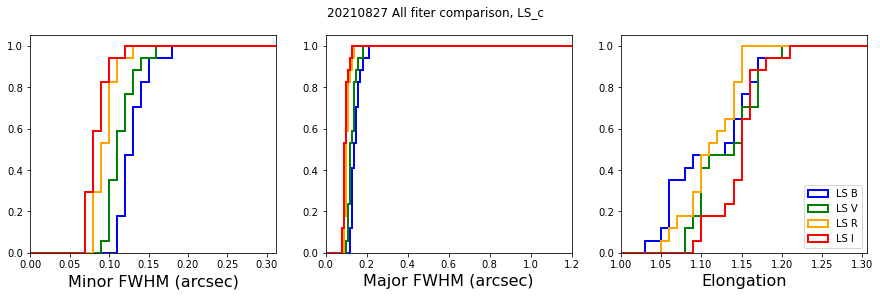

In [99]:
suff = "LS_c"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['LS B', 'LS V', 'LS R', 'LS I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

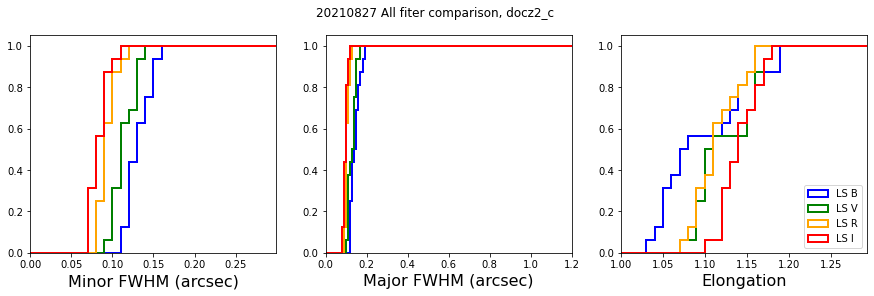

In [102]:
suff = "docz2_c"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['LS B', 'LS V', 'LS R', 'LS I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

# Four Filter Analysis

In [71]:
from imaka.analysis import fourfilt
root = stats_dir

files_c = [root+"stats_LS_c_B.fits", root+"stats_LS_c_V.fits", root+"stats_LS_c_R.fits", root+"stats_LS_c_I.fits"]
files_o = [root+"stats__o_B.fits", root+"stats__o_V.fits", root+"stats__o_R.fits", root+"stats__o_I.fits"]

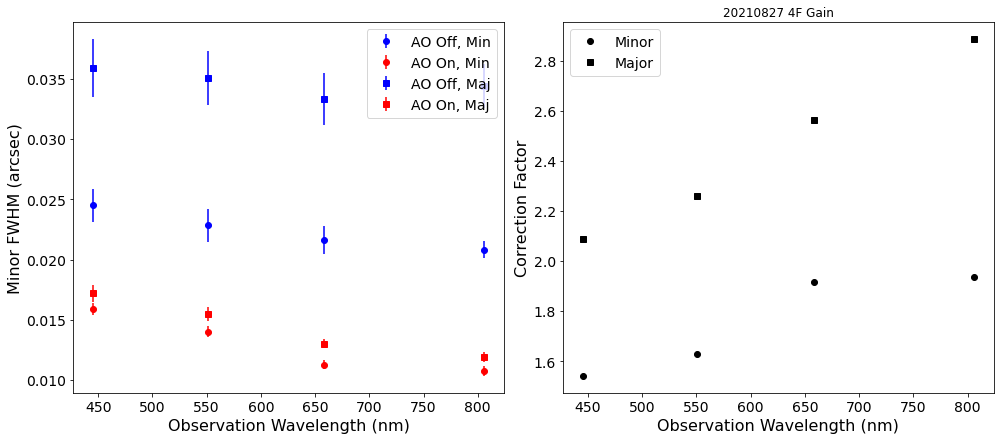

In [76]:
fourfilt.plot_gain(files_o, files_c) 
plt.title(f"{night} 4F Gain")
plt.show()

χ$^2$=0.09
χ$^2$=4.5
α=0.27
α=0.72


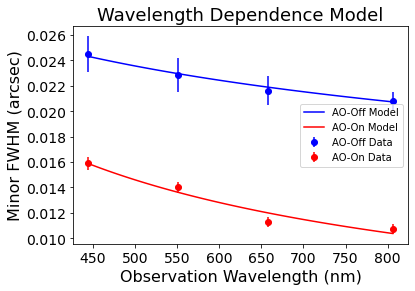

In [88]:
reload(fourfilt)
fourfilt.power_model(files_o, files_c)

# Field Variability

In [19]:
from importlib import reload
reload(plot_stats)

<module 'imaka.analysis.plot_stats' from '/u/eden/code/imaka/imaka/analysis/plot_stats.py'>

### Closed loop, single exposure

sta019LS_c_scan
Median FWHM           = 0.348"
Median FWHM (clipped) = 0.347"
Mean FWHM             = 0.425"
Mean FWHM (clipped)   = 0.356"
Stddev FWHM           = 2.471"
Stddev FWHM (clipped) = 0.054"


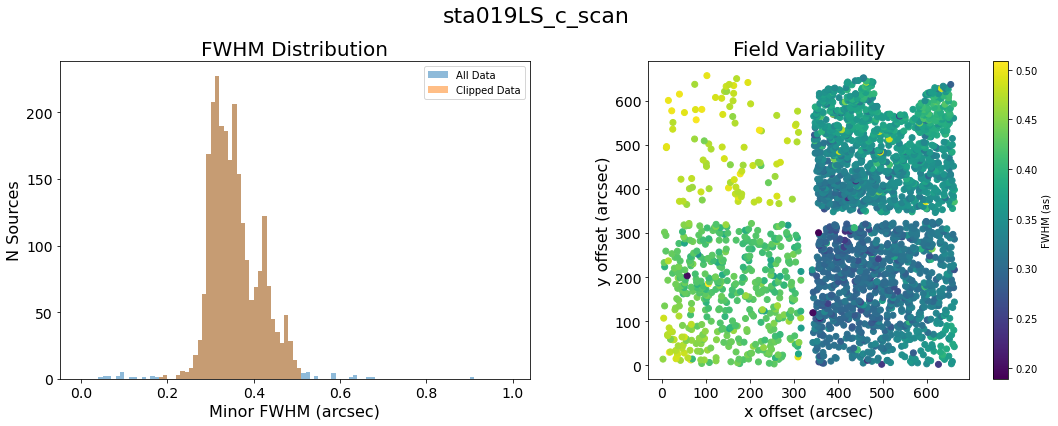

In [78]:
test_img_base = "sta019LS_c_scan"
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, test_img_base)

sta050LS_c_scan
Median FWHM           = 0.344"
Median FWHM (clipped) = 0.344"
Mean FWHM             = 0.390"
Mean FWHM (clipped)   = 0.353"
Stddev FWHM           = 0.802"
Stddev FWHM (clipped) = 0.054"


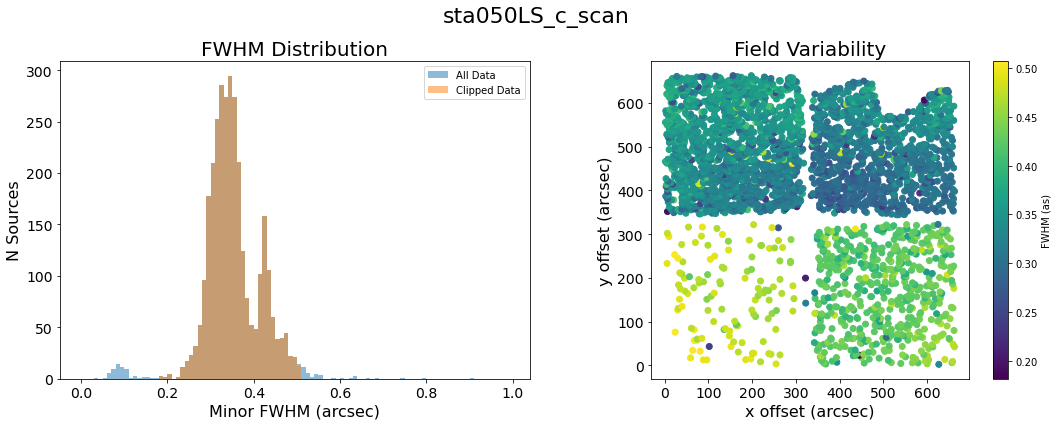

In [9]:
test_img_base = "sta050LS_c_scan"
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, test_img_base)

### Open Loop

Median FWHM           = 0.678"
Median FWHM (clipped) = 0.679"
Mean FWHM             = 0.794"
Mean FWHM (clipped)   = 0.681"
Stddev FWHM           = 1.808"
Stddev FWHM (clipped) = 0.081"


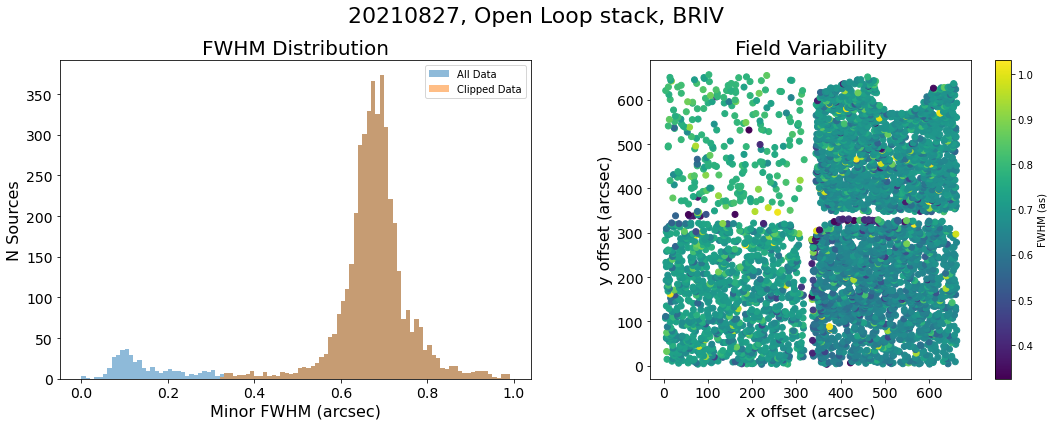

In [79]:
filt = 'BRIV'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop stack, {filt}")

Median FWHM           = 0.766"
Median FWHM (clipped) = 0.767"
Mean FWHM             = 0.785"
Mean FWHM (clipped)   = 0.767"
Stddev FWHM           = 0.614"
Stddev FWHM (clipped) = 0.065"


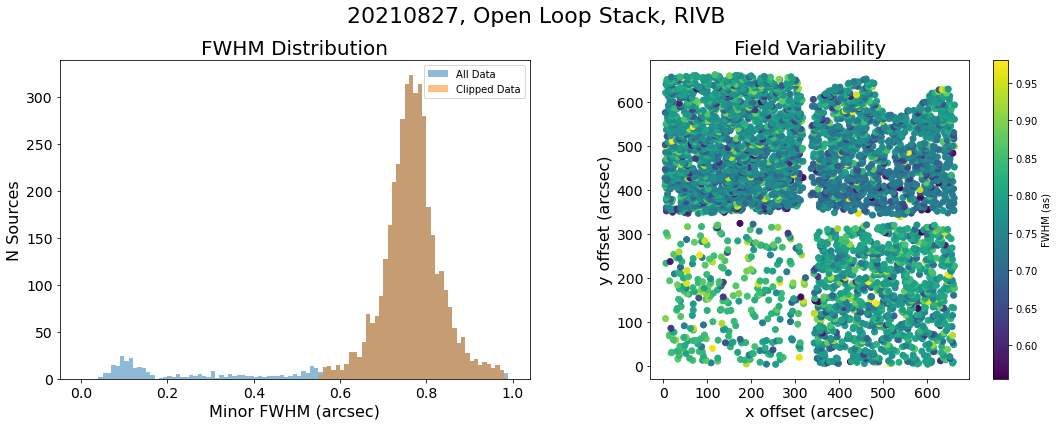

In [80]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop Stack, {filt}")

### Closed (LS)

Median FWHM           = 0.338"
Median FWHM (clipped) = 0.336"
Mean FWHM             = 3053799083.815"
Mean FWHM (clipped)   = 0.589"
Stddev FWHM           = 347534255128.989"
Stddev FWHM (clipped) = 0.937"


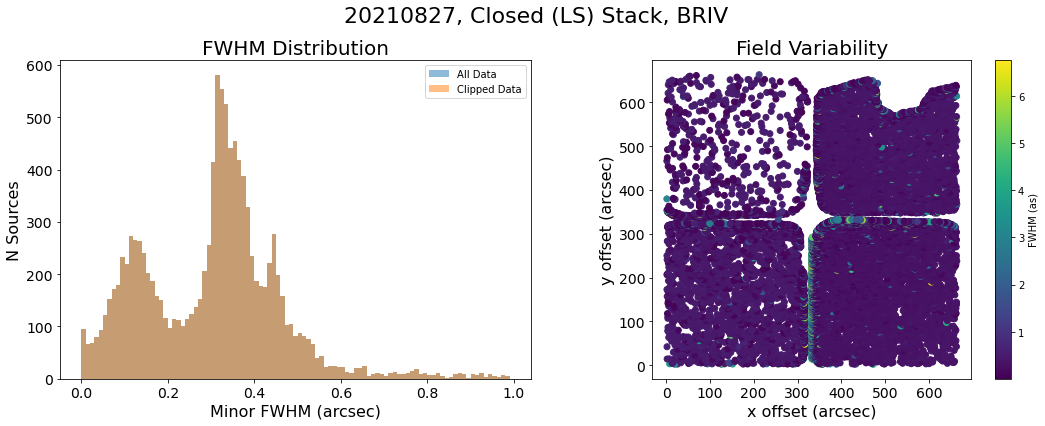

In [81]:
filt = 'BRIV'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (LS) Stack, {filt}")

Median FWHM           = 0.399"
Median FWHM (clipped) = 0.398"
Mean FWHM             = 42.446"
Mean FWHM (clipped)   = 0.390"
Stddev FWHM           = 3266.569"
Stddev FWHM (clipped) = 0.114"


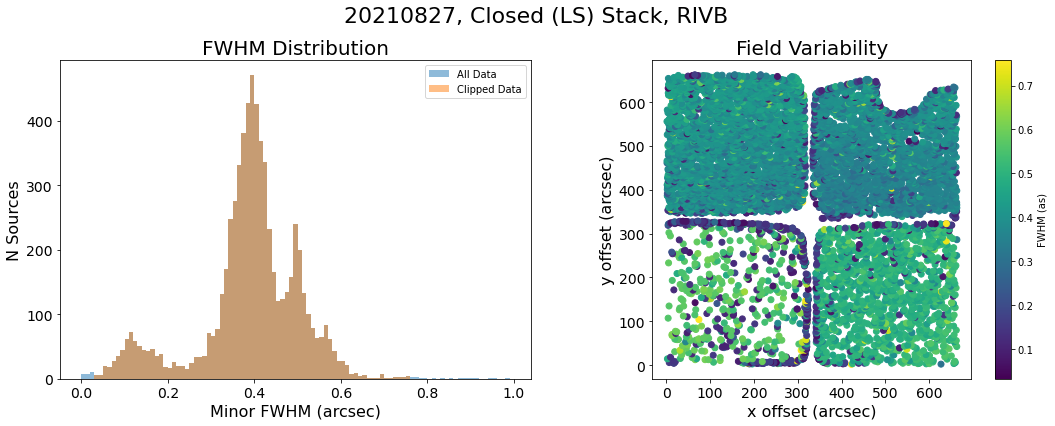

In [82]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (LS) Stack, {filt}")

### Closed (docz)

Median FWHM           = 0.345"
Median FWHM (clipped) = 0.341"
Mean FWHM             = 1425541024722.534"
Mean FWHM (clipped)   = 0.434"
Stddev FWHM           = 149410029198265.219"
Stddev FWHM (clipped) = 0.491"


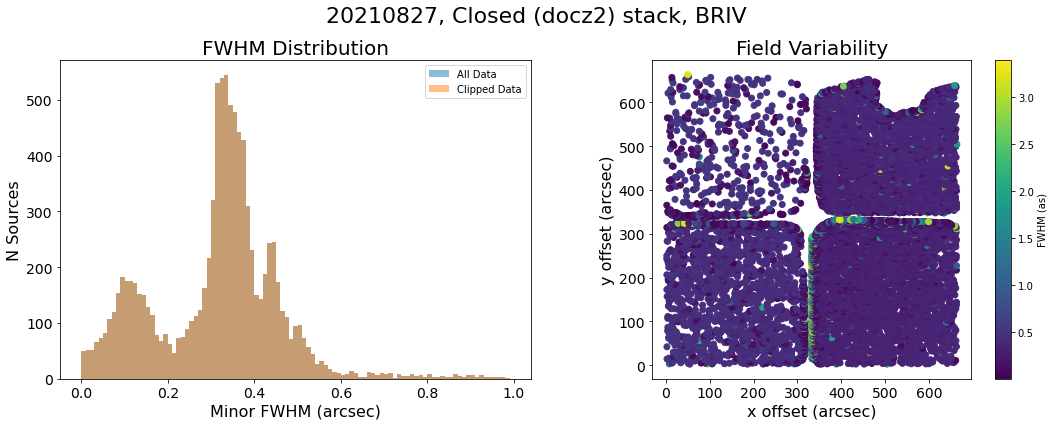

In [83]:
filt = 'BRIV'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

Median FWHM           = 0.400"
Median FWHM (clipped) = 0.398"
Mean FWHM             = 0.712"
Mean FWHM (clipped)   = 0.397"
Stddev FWHM           = 11.580"
Stddev FWHM (clipped) = 0.106"


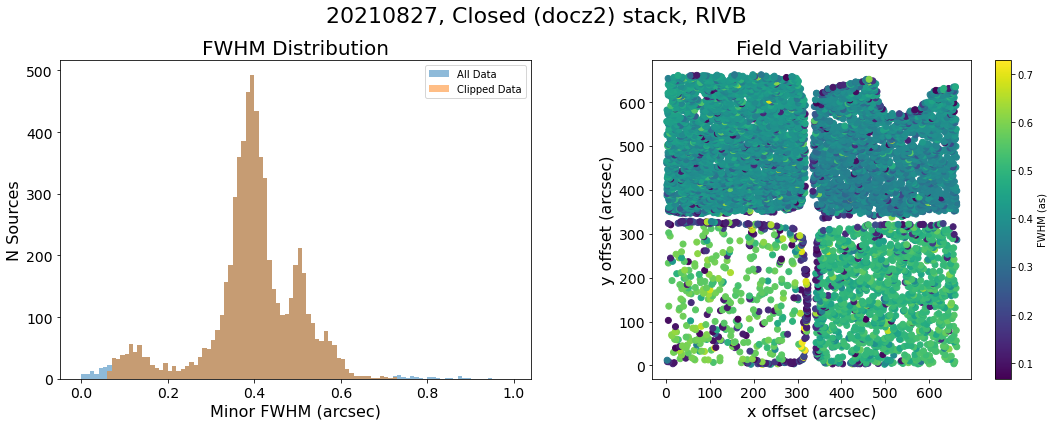

In [10]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

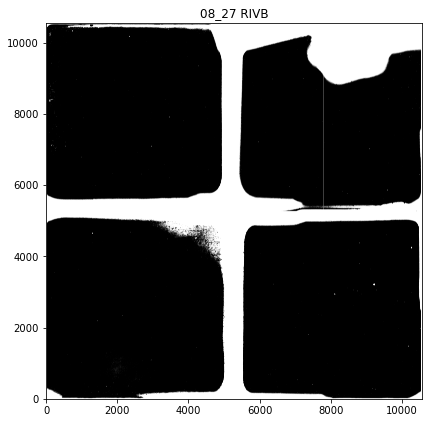

In [16]:
## What masks are we using? how are they different between orientations?
mask_dir = root_dir + "reduce/calib/"

hdul = fits.open(mask_dir +  "mask_RIVB.fits")

data = hdul[0].data

fig = plt.figure(figsize=(6,6))
plt.title("08_27 RIVB")
im = plt.imshow(data, origin ='lower', cmap='gray')
plt.tight_layout()
plt.show()
hdul.close()